In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yfin
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [2]:
#load data
company = "GOOGL"
start = dt.datetime(2015,1,1)
end = dt.datetime.now()
yfin.pdr_override()
df= pdr.get_data_yahoo(company, start, end)
#data = web.DataReader(company, "yahoo", start, end)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,26.629999,26.790001,26.393999,26.477501,26.477501,26480000
2015-01-05,26.357500,26.399500,25.887501,25.973000,25.973000,41182000
2015-01-06,26.025000,26.060499,25.277500,25.332001,25.332001,54456000
2015-01-07,25.547501,25.574499,25.182501,25.257500,25.257500,46918000
2015-01-08,25.075500,25.375000,24.750999,25.345501,25.345501,73054000
...,...,...,...,...,...,...
2023-07-19,124.599998,125.180000,121.800003,122.029999,122.029999,37224000
2023-07-20,121.419998,124.089996,118.220001,119.199997,119.199997,37906800
2023-07-21,120.620003,120.989998,118.730003,120.019997,120.019997,72937900


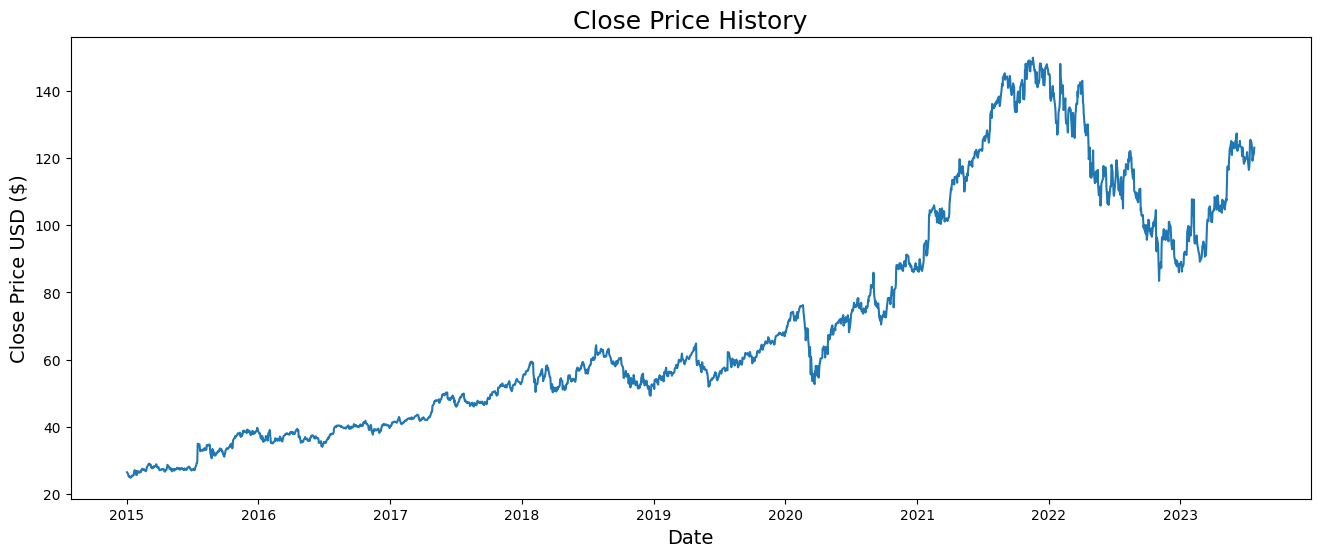

In [3]:
plt.figure(figsize=(16,6))
plt.title('Close Price History', fontsize=18)
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price USD ($)', fontsize=14)
plt.show()

In [4]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2047

In [5]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01299751],
       [0.00896103],
       [0.00383245],
       ...,
       [0.76142429],
       [0.77350571],
       [0.78592317]])

In [6]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.01299751, 0.00896103, 0.00383245, 0.00323637, 0.00394046,
       0.00146416, 0.        , 0.00189622, 0.0035484 , 0.00278032,
       0.00536062, 0.00515259, 0.00933308, 0.01609786, 0.01795808,
       0.01586584, 0.00965311, 0.00614871, 0.00646875, 0.01619788,
       0.01405763, 0.01449768, 0.01161734, 0.01310952, 0.01472971,
       0.0128895 , 0.01724199, 0.01637789, 0.01958227, 0.02164251,
       0.01918222, 0.01823811, 0.01975829, 0.01789807, 0.01517776,
       0.01663793, 0.02011033, 0.02489489, 0.02623104, 0.03118761,
       0.03269579, 0.03251177, 0.03375192, 0.03033952, 0.03081957,
       0.02511891, 0.02345472, 0.02564697, 0.02237859, 0.025835  ,
       0.02422281, 0.02764321, 0.02664709, 0.02715914, 0.02732716,
       0.03219574, 0.02797924, 0.02663508, 0.02419881, 0.02563496])]
[0.023058674500176235]

[array([0.01299751, 0.00896103, 0.00383245, 0.00323637, 0.00394046,
       0.00146416, 0.        , 0.00189622, 0.0035484 , 0.00278032,
       0.00536062, 0.00515259, 0.0

In [7]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1987/1987 [==============================] - 99s 48ms/step - loss: 0.0018


In [8]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

4/4 [==============================] - 1s 40ms/step


3.1727930778805447

<ipython-input-9-593cc9089db4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


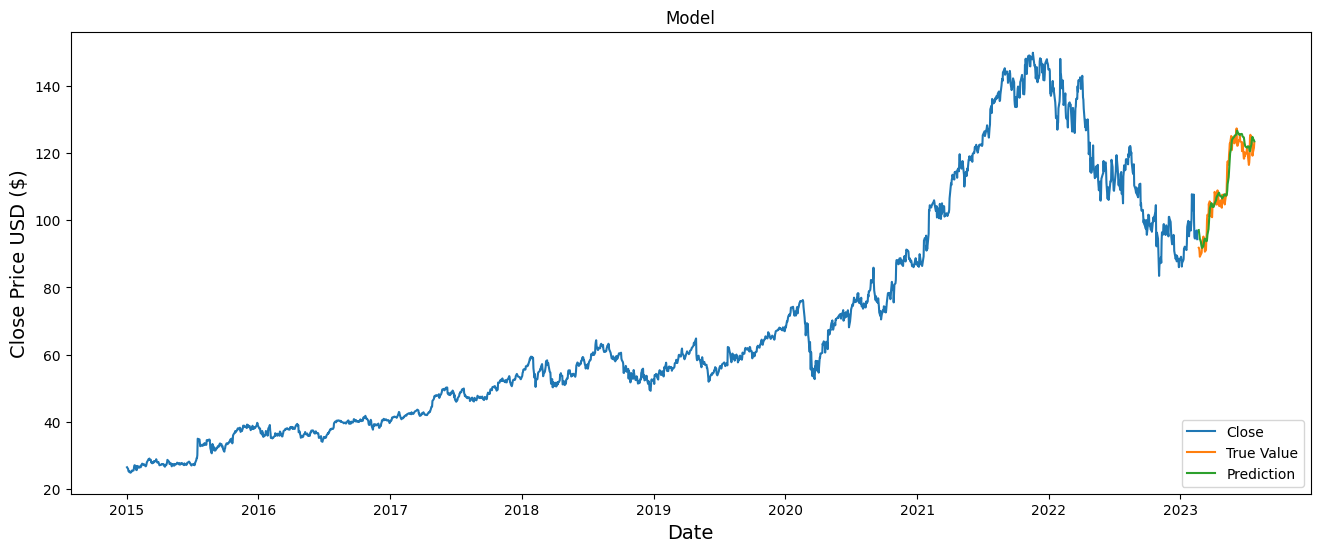

In [9]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price USD ($)', fontsize=14)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Close', 'True Value', 'Prediction'], loc='lower right')
plt.show()